<a href="https://colab.research.google.com/github/MartaAmoresCastillejo/AlgoritmoGenetico-1/blob/main/ALGORITMOGENETICO_MartaAmores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Algoritmo Genético

Marta Amores


La computación evolutiva está compuesta por modelos de evolución cuyos elementos de la población dan solución a problemas. En esta computación encontramos a los algoritmos genéticos que utilizan operadores genéticos sobre los cromosomas.

Estos son métodos flexibles para resolver problemas de búsqueda, optimización  y aprendizaje.. Se basan replicar el modelo de selección natural que propuso Darwin, de acuerdo con la supervivencia del más fuerte.

Para empezar importaremos la librería **deap**. Esta desarrolla el cálculo evolutivo en Python, además tiene un conjunto de herramientas para implementar y porbar algoritmos genéticos. 

In [ ]:
!pip install deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install scoop

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Resolución del problema

Se desea encontrar los **máximos** de la función:
$$f(x,y) = 3(1-x)^2e^{-(x^2)-(y+1)^2}-10(x/5-x^3-y^5 ) - 1/3e^{(x+1)^2-y^2} $$
En el dominio $$\{x,y\} \in [-100,100]$$

En este problema, la cadena cromosomática estaría formada por dos genes (cromosomas), que, al confinarse en forma de lista, quedaría como $$[x_i, y_i]$$ con $$i = 1, 2, ... , n$$

Generalmente queremos una población inicial generada al azar, pudiendo así cada uno de los genes coger cualquier valor con probabilidad uniforme.

In [ ]:
import random
import math
import numpy as np
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import matplotlib.pyplot as plt

In [ ]:
# Importamos la librería
import random
# Fijamos la semilla. Si no cambiamos la semilla, 
# la función generará los mismos número aleatorios
random.seed(0)
# Generamos los números pseudo-aleatorios en 2 list comprenhension
# para encapsular todos los datos en las listas x e y
x = [random.uniform(-100, 100) for i in range(10)]
y = [random.uniform(-100, 100) for i in range(10)]
print('x= ', x)
print('y= ', y)

x=  [68.88437030500961, 51.590880588060486, -15.885683833830996, -48.21664994140733, 2.254944273721705, -19.01317250991714, 56.75971780695451, -39.33745478421451, -4.680609169528836, 16.676407891006235]
y=  [81.62257703906704, 0.9373711634780477, -43.63243112005924, 51.16084083144477, 23.67379933506632, -49.898731727511894, 81.94925119364802, 96.55709520753061, 62.04344719931791, 80.43319008791653]


Vemos que en las dos listas obtenemos números entre el -100 y 100. 

#### ------------------------------------------------------------------

#### NOTA 2: ESPACIO DE BÚSQUEDA O DOMINIO DE LA SOLUCIÓN -

##### Visualicemos nuestra función

In [ ]:
# Importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [ ]:
# Definimos la función objetivo
def funcion_prueba(x):
    # x es x[0] e y es x[1]
    parte1 = 3 * (1 - x[0])**2 * np.exp(-(x[0]**2) - (x[1] + 1)**2)
    parte2 = -10 * (x[0] / 5 - x[0]**3 - x[1]**5) * np.exp(-x[0]**2 - x[1]**2)
    parte3 = -(1 / 3) * np.exp(-(x[0] + 1)**2 - x[1]**2)
    res = parte1 + parte2 + parte3
    return res

Generamos unos vectores que nos devuelvan los puntos espaciados uniformemente, entre -3 y 3. 

In [ ]:
# Generamos vectores que barran todo el dominio
x = np.linspace(-3, 3, 1000)
y = np.linspace(-3, 3, 1000)
print('x= ', x)
print('y= ', y)

x=  [-3.         -2.99399399 -2.98798799 -2.98198198 -2.97597598 -2.96996997
 -2.96396396 -2.95795796 -2.95195195 -2.94594595 -2.93993994 -2.93393393
 -2.92792793 -2.92192192 -2.91591592 -2.90990991 -2.9039039  -2.8978979
 -2.89189189 -2.88588589 -2.87987988 -2.87387387 -2.86786787 -2.86186186
 -2.85585586 -2.84984985 -2.84384384 -2.83783784 -2.83183183 -2.82582583
 -2.81981982 -2.81381381 -2.80780781 -2.8018018  -2.7957958  -2.78978979
 -2.78378378 -2.77777778 -2.77177177 -2.76576577 -2.75975976 -2.75375375
 -2.74774775 -2.74174174 -2.73573574 -2.72972973 -2.72372372 -2.71771772
 -2.71171171 -2.70570571 -2.6996997  -2.69369369 -2.68768769 -2.68168168
 -2.67567568 -2.66966967 -2.66366366 -2.65765766 -2.65165165 -2.64564565
 -2.63963964 -2.63363363 -2.62762763 -2.62162162 -2.61561562 -2.60960961
 -2.6036036  -2.5975976  -2.59159159 -2.58558559 -2.57957958 -2.57357357
 -2.56756757 -2.56156156 -2.55555556 -2.54954955 -2.54354354 -2.53753754
 -2.53153153 -2.52552553 -2.51951952 -2.51351351

In [ ]:
# Evaluamos todos los valores de las variables
x_ax, y_ax = np.meshgrid(x, y)
vals = np.c_[x_ax.ravel(), y_ax.ravel()]
fx = np.reshape([funcion_prueba(val) for val in vals],(1000, 1000))

Text(0.5, 0, 'f(x,y)')

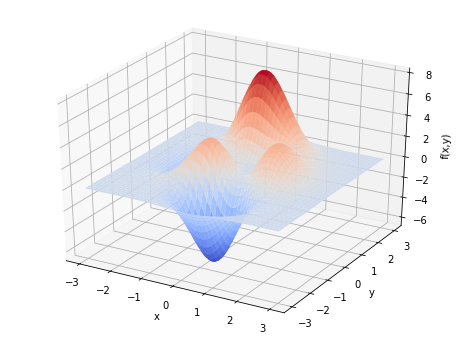

In [ ]:
# Representamos los resultados obtenidos
figure_3d = plt.figure(figsize=(8,6))
ax = figure_3d.gca(projection="3d")
ax.plot_surface(x_ax, y_ax, fx, cmap=cm.coolwarm)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")

#### ------------------------------------------------------------------

#### 1. Definición del problema y generación de la población inicial

Se importan las librerías necesarias

In [ ]:
import random
from deap import base
from deap import creator
from deap import tools

##### 1. Creación del problema

Primero debemos generar el tipo de problema que se quiere resolver, en este caso, una función de optimización de máximos. De base se obtiene la creación de una función que la hemos llamado "FitnessMax", esta contiene el atributo `values` que indica el valor del fitness de cada individuo, `dominates` esta devuelve True si una solución es peor que otra, y `valid` que nos dice cuando el fitness del individuo es válido, este se considera **inválido** cuando un bit varia. 

In [ ]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

`Weights` nos afirma que es un problema de máximos porque es positivo (el número que encontramos)

Lo que realmente hemos hecho es:
```
# Importamos las librerías necesarias
from deap import base

# Generamos la clase
class MaxFitness(base.Fitness):
  weights = (1.0,)
```

Creamos como queremos que sea nuestro invidivuo, este hereada de Python la clase `list`, que contiene de fitness que es del tipo de "FitnessMax".

In [ ]:
creator.create("Individual", list, fitness=creator.FitnessMax)

Lo que realmente hemos hecho hasta ahora:
```
# Importamos las librerías necesarias
from deap import base

# Generamos la clase
class MaxFitness(base.Fitness):
  weights = (1.0,)

# Generamos la clase Individual
class Individual(list)
  fitness = MaxFitness
```

In [ ]:
toolbox = base.Toolbox()

En el `Toolbox` registraremos funciones necesarias para ejecutar el AG, a través del método `register` de la clase `base.Toolbox` que tiene los atributos:
* `alias`: El nombre con el que registramos la función en el `Toolbox`
* `function`: La función que estamos registrando
* `argument`: Los argumentos que se pasan a la función

Dentro de `ToolBox` generamos la función `attr_uniform` que esta nos permite  generar los genes aisladamente en un intervalo de -100 y 100. 

In [ ]:
# Generación de genes
toolbox.register("attr_uniform", random.uniform, -100, 100)

In [ ]:
# Probamos y vemos que generamos un número leatorio entre -100 y 100 distinto cada vez
toolbox.attr_uniform()

-37.970486136133474

Lo que realmente hemos hecho hasta ahora:
```
# Importamos las librerías necesarias
import random

# Definimos la función correspondiente
def funcion(a=-100, b=100):
  return random.uniform(a,b)

# Definimos la clase
class Toolbox(object)
  attr_uniform = function
```

La función `invidivual` me permite generar un **par** de genes. 

In [ ]:
# Generación de inviduos
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, 2)

In [ ]:
# Ejemplo de la generación de un individuo aleatorio
individuo = toolbox.individual()
individuo

[45.96634965202574, 79.7676575935987]

In [ ]:
# Recordar que individuo es una lista que tiene un atributo fitness
# donde se almacena la calidad del mismo, que al principio será
# vacío, porque aun no ha sido evaluado
individuo.fitness.values

()

Genero la población: 

In [ ]:

toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 100)

In [ ]:
# Ejemplo de creación de una población. Se ve que es
# una lista de 32 listas (una por cada individuo)
poblacion = toolbox.population()
print(poblacion)

[[36.79678638308826, -5.571456909457325], [-79.85975838632683, -13.165632909243257], [22.177394688760316, 82.60221064757965], [93.32127355415176, -4.5980446894566], [73.061985554328, -47.90153792160812], [61.005565402604475, 9.739860767117861], [-97.19165996719622, 43.94093728079082], [-20.235291555146247, 64.96899542964661], [33.63064024637018, -99.77143613711435], [-1.284426706935065, 73.52055509855617], [-51.2178246225736, -34.95912745052199], [74.09424642173093, -61.78658169952189], [13.50214812413438, -52.27681427695596], [93.50805005802866, 60.63589385597402], [-10.406085712885925, -83.91083628949292], [-35.98907906549084, 1.5881285041147777], [86.56676484538136, -78.18843081377926], [10.253449218110248, 41.312281973377935], [9.488182265684756, 62.8933726582672], [8.056721394064795, 92.76770919476019], [20.63712559227659, 17.52341283508727], [-11.00219474489677, 19.257372316621257], [-23.019770805467914, 15.130202832977702], [-41.934099519448395, -62.121734289128774], [-62.654094

In [ ]:
# Cada individuo tiene 2 componentes
poblacion[0]

[36.79678638308826, -5.571456909457325]

In [ ]:
poblacion[0].fitness.values

()

##### 2. Función Objetivo

Dividimos funciones objetivo en:
* F.O. codificadas en Python: [math](https://docs.python.org/3.6/library/math.html) o [scipy](https://docs.scipy.org/doc/scipy) (en nuestro ejemplo lo haremos así)
* F.O. que llaman a un programa externo para obtener el desempeño del individuo, para modelo muy complejos: [módulo nativo os](https://docs.python.org/3/library/os.html) o [módulo subproccess](https://docs.python.org/3.6/library/subprocess.html) (no lo usaremos en nuestro ejemplo)


In [ ]:
import math 
def funcion_objetivo(x):
    """
    Función objetivo de nuestro problema
    """
    for i in range(len(x)):
        if x[i] > 100 or x[i] < -100:
            return -1,

    parte1 = 3 * (1 - x[0])**2 * math.exp(-(x[0]**2) - (x[1] + 1)**2)
    parte2 = -10 * (x[0] / 5 - x[0]**3 - x[1]**5) * math.exp(-x[0]**2 - x[1]**2)
    parte3 = -1 / 3 * math.exp(-(x[0] + 1)**2 - x[1]**2)
    return parte1 + parte2 + parte3, 


Creo evaluate donde meto dentro nuestra función objetivo. 

In [ ]:
toolbox.register("evaluate", funcion_objetivo)

In [ ]:
individuo

[45.96634965202574, 79.7676575935987]

In [ ]:
# Ejemplo de uso 1
funcion_objetivo(individuo)

(0.0,)

In [ ]:
# Ejemplo de uso 2
toolbox.evaluate(individuo)

(0.0,)

No olvidar que la **función fitness devuelve una tupla** ya que la solución es generalista para un problema genérico **multiobjetivo**, aunque en nuestro caso solo sea uno

**IMPORTANTE!!:** Sed conscientes de la relevancia de **codificar de manera eficiente la función objetivo**. Se ejecutará un gran número de veces y cualquier ahorro de tiempo cuenta. **Evitar bucles** o **condiciones que puedan dejar colgado el algoritmo** (siempre que se pueda)

**CRUCE**

##### 3.1 Cruce basado en un punto

El proceso consiste en seleccionar un punto de cruce en ambos padres y combinar los segmentos de cada padre a partir de ese punto.

Pongamos esto frente a un ejemplo:

Solución A: **[1, 0, 0, 1, 1, 0]**


Solución B: **[0, 1, 1, 0, 0, 1]**

Si nuestro punto de cruce es seleccionado en el índice 2, las nuevas soluciones serian:

Solución C: **[1, 0, 1, 0, 0, 1]**

Solución D: **[0, 1, 0, 1, 1, 0]**



In [ ]:
# Registro de operacion genética de cruce
toolbox.register("mate", tools.cxOnePoint)

**MUTACIÓN**

Utilizamos el operador `mutGaussian` (mutación Gaussiana) con una media de 0 y una deviación típica de 5

In [ ]:
toolbox.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 5, indpb=0.1)

Consiste en mutar, con una probabilidad del 0.1 cada uno de los genes del individuo, sumando a cada uno de ellos una cierta cantidad aleatoria. 

**SELECCIÓN**

En este caso utilizaremos la selección por torneo, donde consiste en escoger un número de individuos de la población inicial, en este caso con un tamaño de 3, y  seleccionar el mejor individuo de este grupo,  repetir el proceso hasta que el número de individuos seleccionados coincida con el tamaño de la población. Cuando nos referimos al mejor individuo nos referimos aquel que tiene el fitness más alto. 

In [ ]:
toolbox.register("select", tools.selTournament, tournsize=3)

Representación de la evolución con el cruce basado en un punto. 

In [ ]:
def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    ax1.fill_between(gen, fit_mins, fit_maxs,
                     where=fit_maxs >= fit_mins, facecolor='g', alpha = 0.2)
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.set_ylim([-10, 160])
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)
    plt.savefig("Convergencia.eps", dpi = 300)

In [ ]:
def main():
    random.seed(42)
    CXPB, MUTPB, NGEN = 0.5, 0.2, 20
    pop = toolbox.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
    return hof, logbook

<ipython-input-130-a0277e2a9551>:14: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.
  ax1.fill_between(gen, fit_mins, fit_maxs,


gen	nevals	avg        	std        	min         	max        
0  	100   	1.93843e-50	1.92871e-49	-8.19747e-63	1.93843e-48
1  	49    	-0.01      	0.0994987  	-1          	1.93843e-48
2  	52    	9.54873e-32	9.50086e-31	0           	9.54873e-30
3  	64    	2.86462e-31	1.62889e-30	-3.56017e-85	9.54873e-30
4  	58    	-0.000366985	0.00365146 	-0.0366985  	6.5714e-21 
5  	54    	1.99884e-21 	1.53568e-20	0           	1.53884e-19
6  	50    	1.83181e-20 	7.80529e-20	-1.32976e-61	3.93195e-19
7  	74    	1.70604e-11 	1.69749e-10	-2.91446e-52	1.70604e-09
8  	51    	1.36313e-09 	1.33926e-08	5.33806e-108	1.34607e-07
9  	50    	5.38428e-09 	2.63774e-08	5.92491e-35 	1.34607e-07
10 	50    	1.8845e-08  	4.67068e-08	6.5714e-21  	1.34607e-07
11 	65    	4.98379e-08 	6.49853e-08	1.53884e-19 	1.3565e-07 
12 	52    	1.01114e-07 	5.80737e-08	9.20815e-18 	1.35972e-07
13 	50    	0.0662859   	0.653976   	2.63794e-18 	6.57303    
14 	70    	0.176375    	1.01234    	8.50633e-20 	6.57303    
15 	60    	0.268031    	1.293

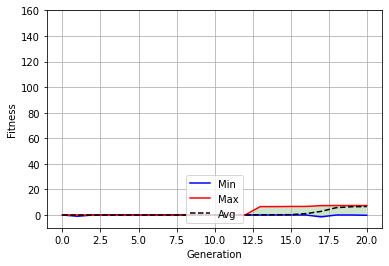

In [ ]:
best, log = main()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])
plot_evolucion(log)

##### 3.2 Cruce basado en dos puntos

El cruce basado en dos puntos es similar al cruce basado en un punto con la diferencia de seleccionar dos puntos de corte.

Imaginémonos el mismo ejemplo anterior: 

Solución A: **[1, 0, 0, 1, 1, 0]**

Solución B: **[0, 1, 1, 0, 0, 1]**

En este caso vamos a seleccionar los puntos de corte en los índices 2 y 4, el resultado quedaría así: 

Solución C: **[1, 0, 1, 0, 1, 0]**

Solución D: **[0, 1, 0, 1, 0, 1]**

El punto de cruce en dos puntos puede ser más efectivo que el anterior ya que nos permite combinar una mayor cantidad de segmentos. Aunque sin embargo es más complejo de implementar y puede requerir más tiempo de procesamiento. Así que es importante evaluar cuál de las dos técnicas es más eficiente para nuestro problema. 



In [ ]:
toolbox.register("mate", tools.cxTwoPoint)

**MUTACIÓN**

In [ ]:
toolbox.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 5, indpb=0.1)

**SELECCIÓN**

In [ ]:
toolbox.register("select", tools.selTournament, tournsize=3)

Representación de la evolución basado en dos puntos de cruce.

In [ ]:
def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    ax1.fill_between(gen, fit_mins, fit_maxs,
                     where=fit_maxs >= fit_mins, facecolor='g', alpha = 0.2)
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.set_ylim([-10, 160])
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)
    plt.savefig("Convergencia.eps", dpi = 300)

In [ ]:
def main():
    random.seed(42)
    CXPB, MUTPB, NGEN = 0.5, 0.2, 20
    pop = toolbox.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
    return hof, logbook

<ipython-input-136-a0277e2a9551>:14: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.
  ax1.fill_between(gen, fit_mins, fit_maxs,


gen	nevals	avg        	std        	min         	max        
0  	100   	1.93843e-50	1.92871e-49	-8.19747e-63	1.93843e-48
1  	55    	9.69215e-50	4.2247e-49 	-5.6445e-140	1.93843e-48
2  	54    	-2.77757e-10	2.76365e-09	-2.77757e-08	9.62191e-38
3  	54    	1.39112e-25 	1.38414e-24	0           	1.39112e-23
4  	43    	-2.77757e-10	2.76365e-09	-2.77757e-08	1.39112e-23
5  	61    	9.2011e-15  	6.63727e-14	0           	5.84792e-13
6  	64    	-8.5687e-05 	0.000852575	-0.0085687  	5.84792e-13
7  	61    	0.00101441  	0.0100932  	4.41527e-65 	0.101441   
8  	51    	0.0653251   	0.617144   	-6.94448e-08	6.20338    
9  	55    	0.197282    	1.05693    	-6.23852e-14	6.20338    
10 	58    	0.617602    	1.87859    	-2.43588    	6.20338    
11 	59    	1.79351     	2.75949    	-9.91273e-17	6.20338    
12 	52    	4.34659     	2.78739    	-0.491237   	6.20338    
13 	66    	5.90065     	1.27026    	9.62e-33    	6.20338    
14 	60    	5.84401     	1.62766    	-4.9379     	6.20338    
15 	65    	5.86283     	1.5

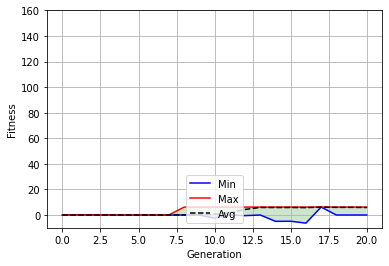

In [ ]:
best, log = main()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])
plot_evolucion(log)

##### 3.3 Cruce uniforme

**MUTACIÓN**

In [ ]:
toolbox.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 5, indpb=0.1)

Este algoritmo de cruce tiene algo diferente y esque existe una llamada 'máscara de cruce', esta será la responsable de que los bits se intercambien. 

Imaginémonos dos padres:

A= **[1011001] [101100]**

B=**[1000111] [100011]**

Y una máscara de cruce: **[1110000][110001]**

Su descendiente saldrá: **[1010111][100010]**


In [ ]:
# Registro de operacion genética de cruce
toolbox.register("mate", tools.cxUniform,indpb=0.3)

**SELECCIÓN**

In [ ]:
toolbox.register("select", tools.selTournament, tournsize=3)

Representación de la evolución con el cruce uniforme.

In [ ]:
def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    ax1.fill_between(gen, fit_mins, fit_maxs,
                     where=fit_maxs >= fit_mins, facecolor='g', alpha = 0.2)
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.set_ylim([-10, 160])
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)
    plt.savefig("Convergencia.eps", dpi = 300)

In [ ]:
def main():
    random.seed(42)
    CXPB, MUTPB, NGEN = 0.5, 0.2, 20
    pop = toolbox.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
    return hof, logbook

<ipython-input-153-a0277e2a9551>:14: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.
  ax1.fill_between(gen, fit_mins, fit_maxs,


gen	nevals	avg        	std        	min         	max        
0  	100   	1.93843e-50	1.92871e-49	-8.19747e-63	1.93843e-48
1  	48    	1.16306e-49	4.60351e-49	0           	1.93843e-48
2  	58    	9.62191e-40	9.57368e-39	-8.02396e-118	9.62191e-38
3  	57    	1.39112e-25	1.38414e-24	-4.58509e-137	1.39112e-23
4  	57    	2.79554e-25	1.94742e-24	0            	1.39112e-23
5  	53    	5.60438e-25	2.7253e-24 	3.03933e-94  	1.39112e-23
6  	66    	1.11799e-14	7.83302e-14	1.04165e-50  	5.84792e-13
7  	58    	4.06536e-12	4.03962e-11	3.65668e-65  	4.06002e-10
8  	61    	4.0941e-12 	4.03935e-11	1.48503e-58  	4.06002e-10
9  	60    	3.24254e-06	3.22164e-05	-7.63619e-10 	0.000323791
10 	59    	9.72026e-06	5.52335e-05	-1.74298e-07 	0.000323791
11 	63    	0.000601862	0.00571656 	-1.74298e-07 	0.0574737  
12 	60    	0.00354115 	0.0136297  	-1.69308e-21 	0.0574737  
13 	59    	0.00898174 	0.0206476  	-1.74298e-07 	0.0663658  
14 	55    	0.0548067  	0.239243   	1.8914e-07   	2.163      
15 	67    	0.086346   	0.68

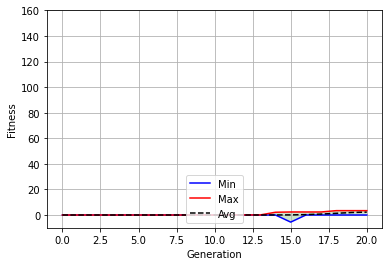

In [ ]:
best, log = main()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])
plot_evolucion(log)

##### CONCLUSIONES




A priori lo que queremos buscar es obtener la mejor población, como deciamos al principio es obtener la población más fuerte entonces en ese caso podemos escoger la primera población (la de un único punto de cruce). Con dos puntos de cruce en menor tiempo llegas a obtener mejor población. 
El cruce uniforme no nos sirve para el tipo de problema que hempos planteado. 